In [1]:
import seaborn as sns

import numpy as np

import networkx as nx

import matplotlib.pyplot as plt

import scipy

In [2]:
def createCorellMatrix(x):
  val=np.unique(x);
  ng=len(val)
  n=len(x);
  #création et initiation du matrice
  corr=np.zeros((ng,ng));
  #création du matrice correlogramme
  for i in range(1,n-1):
    for j in range(1,n-1):
      a=x[i][j][1];
      for l in range(-1,2):
        for k in range(-1,2):
          if not(l==0 and k==0) :
            b=x[i+l][j+k][1];
            corr[a][b]=corr[a][b]+1;
  return corr;
    


In [3]:
#calcul du diagonale
def Diagonale(x):
  diag=x.diagonal();
  return diag;

In [4]:
#calcul du similarité
def Distance(H1,H2):
  minimum=0;
  somme=0;
  ng=len(H1)
  for i in range(ng):
    minimum=minimum+min(H1[i],H2[i]);
    somme=somme+H1[i];
  Dinter=1-(minimum/somme);
  return Dinter;

In [24]:
import glob
import cv2 as cv
from skimage import io, color
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
path = glob.glob(f"/gdrive/My Drive/dataset/train/fleur de lys/*.*")


cv_img = []


for img in path:
    n = cv.imread(img)
    n = cv.resize(n,(200,200))
    n = cv.cvtColor(n, cv.COLOR_BGR2RGB)
    cv_img.append(n)





Mounted at /gdrive


Mounted at /gdrive
l'image requete est :


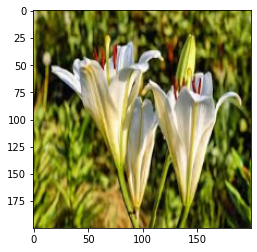

les images similaires sont:
la distance entre l image /gdrive/My Drive/dataset/test/fleur/img6.jpg et l image /gdrive/My Drive/dataset/train/fleur de lys/img2.jpg est 0.3312802463704355 ;


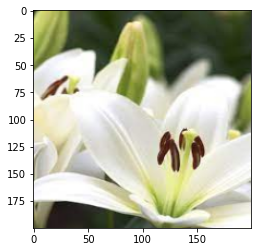

la distance entre l image /gdrive/My Drive/dataset/test/fleur/img6.jpg et l image /gdrive/My Drive/dataset/train/fleur de lys/img4.jpg est 0.2818961724593049 ;


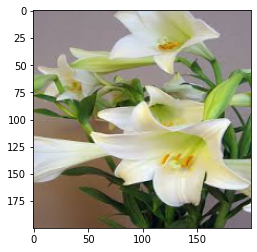

la distance entre l image /gdrive/My Drive/dataset/test/fleur/img6.jpg et l image /gdrive/My Drive/dataset/train/fleur de lys/img5.jpg est 0.1871975362956445 ;


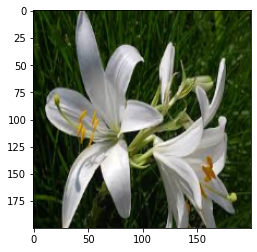

la distance entre l image /gdrive/My Drive/dataset/test/fleur/img6.jpg et l image /gdrive/My Drive/dataset/train/fleur de lys/img6.jpg est 0.0 ;


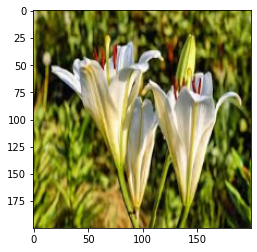

la distance entre l image /gdrive/My Drive/dataset/test/fleur/img6.jpg et l image /gdrive/My Drive/dataset/train/fleur de lys/img7.jpg est 0.11548614166300042 ;


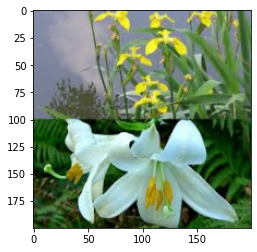

la distance entre l image /gdrive/My Drive/dataset/test/fleur/img6.jpg et l image /gdrive/My Drive/dataset/train/fleur de lys/img8.jpg est 0.16245050593928734 ;


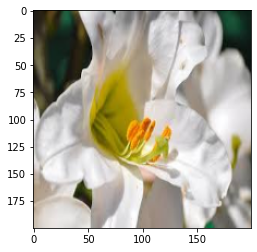

la distance entre l image /gdrive/My Drive/dataset/test/fleur/img6.jpg et l image /gdrive/My Drive/dataset/train/fleur de lys/img9.jpg est 0.37285525736911573 ;


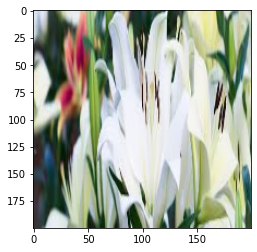

la distance entre l image /gdrive/My Drive/dataset/test/fleur/img6.jpg et l image /gdrive/My Drive/dataset/train/fleur de lys/img10.jpg est 0.18906731192256931 ;


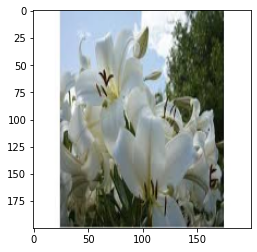

la distance entre l image /gdrive/My Drive/dataset/test/fleur/img6.jpg et l image /gdrive/My Drive/dataset/train/fleur de lys/img11.jpg est 0.21491421029476465 ;


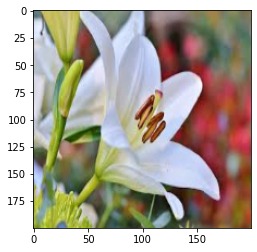

la distance entre l image /gdrive/My Drive/dataset/test/fleur/img6.jpg et l image /gdrive/My Drive/dataset/train/fleur de lys/img13.jpg est 0.2587989441267048 ;


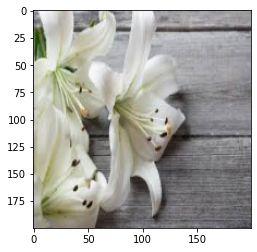

la distance entre l image /gdrive/My Drive/dataset/test/fleur/img6.jpg et l image /gdrive/My Drive/dataset/train/fleur de lys/img18.jpg est 0.2926748790145183 ;


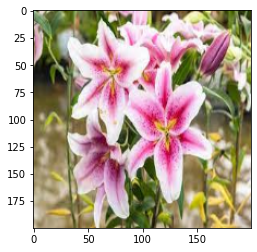

la distance entre l image /gdrive/My Drive/dataset/test/fleur/img6.jpg et l image /gdrive/My Drive/dataset/train/fleur de lys/img20.jpg est 0.10624725032996041 ;


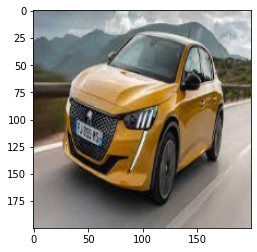

In [25]:
a=len(cv_img)
diag=[]
#calculer  les signatures des images de la base d'apprentissage
for i in range(a):
  res=createCorellMatrix(cv_img[i]);
  diag.append(Diagonale(res));
#chargements de la base du test
drive.mount('/gdrive', force_remount=True)
path_test= glob.glob(f"/gdrive/My Drive/dataset/test/fleur/*.*");

#Choisir une image de la base du test qui existe ainsi dans la base d'apprentissage
img_test= cv.imread(path_test[5]);
img_test=cv.resize(img_test,(200,200));
img_test = cv.cvtColor(img_test, cv.COLOR_BGR2RGB)

#show image test
print('\033[91m' +"l'image requete est :"+'\033[0m' )
plt.imshow(img_test)
plt.show()
#determiner la matrice correlogramme de l'image requete
corellMatrix_test=createCorellMatrix(img_test);
#determiner la signature de l'image requete
diag_test=Diagonale(corellMatrix_test);
#comparaison du similitude par la distance d'intersection
print('\033[91m'+"les images similaires sont:"+'\033[0m')
for i in range(a):
  d=Distance(diag_test,diag[i]);
  print("la distance entre l image "+str(path_test[5])+" et l image "+str(path[i])+" est "+str(d)+" ;")
  plt.imshow(cv_img[i])
  plt.show()